In [1]:
#pip install -q datasets

In [2]:
#pip install -q evaluate

In [ ]:
#!pip install seaborn

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
import evaluate
import numpy as np
from sklearn.model_selection import KFold
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import transformers
print(transformers.__version__)

4.56.1


In [5]:
import os
os.environ["WANDB_DISABLED"] = "true"

from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer

In [6]:
df_nat = pd.read_csv("clickbait_title_classification.csv")
df_nat = df_nat.rename(columns={"clickbait": "labels"})

In [7]:
df_synthetic = pd.read_csv("synthetic_1.csv")
df_synthetic = df_synthetic.rename(columns={"clickbait": "labels"})

In [8]:
print(df_nat.shape)
print(df_synthetic.shape)

(32000, 2)
(16000, 2)


In [9]:
df_nat_half, _ = train_test_split(df_nat,train_size=0.5,stratify=df_nat['labels'], random_state=42)

df = pd.concat([df_nat_half, df_synthetic], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df['labels'].value_counts()) 
print(df.shape)

labels
0    16001
1    15999
Name: count, dtype: int64
(32000, 2)


In [10]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [11]:
def tokenize_fn(examples):
    return tokenizer(
        examples["title"],
        padding="max_length",
        truncation=True,
        max_length=128,
    )

In [12]:
accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")
roc_auc = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # Convert logits to predicted class
    preds = np.argmax(logits, axis=-1)

    # Convert logits to probabilities for ROC AUC
    probs = 1 / (1 + np.exp(-logits[:, 1]))  # sigmoid on class 1 logits

    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "precision": precision.compute(predictions=preds, references=labels, average="binary")["precision"],
        "recall": recall.compute(predictions=preds, references=labels, average="binary")["recall"],
        "f1": f1.compute(predictions=preds, references=labels, average="binary")["f1"],
        "roc_auc": roc_auc.compute(prediction_scores=probs, references=labels)["roc_auc"]
    }

In [13]:
#pip show transformers accelerate torch

In [14]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

for param in model.bert.parameters():
        param.requires_grad = False
    
for name, param in model.named_parameters():
    print(name, param.requires_grad)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert.embeddings.word_embeddings.weight False
bert.embeddings.position_embeddings.weight False
bert.embeddings.token_type_embeddings.weight False
bert.embeddings.LayerNorm.weight False
bert.embeddings.LayerNorm.bias False
bert.encoder.layer.0.attention.self.query.weight False
bert.encoder.layer.0.attention.self.query.bias False
bert.encoder.layer.0.attention.self.key.weight False
bert.encoder.layer.0.attention.self.key.bias False
bert.encoder.layer.0.attention.self.value.weight False
bert.encoder.layer.0.attention.self.value.bias False
bert.encoder.layer.0.attention.output.dense.weight False
bert.encoder.layer.0.attention.output.dense.bias False
bert.encoder.layer.0.attention.output.LayerNorm.weight False
bert.encoder.layer.0.attention.output.LayerNorm.bias False
bert.encoder.layer.0.intermediate.dense.weight False
bert.encoder.layer.0.intermediate.dense.bias False
bert.encoder.layer.0.output.dense.weight False
bert.encoder.layer.0.output.dense.bias False
bert.encoder.layer.0.output.Lay

=== Fold 1 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.223100,0.199779,0.930000,0.927861,0.932500,0.930175,0.980491
2,0.157800,0.164210,0.945312,0.937385,0.954375,0.945804,0.985770
3,0.182800,0.156835,0.946875,0.941358,0.953125,0.947205,0.986948



 Fold 1 complete.

Confusion Matrix for Fold 1:
[[1504  100]
 [  94 1502]]


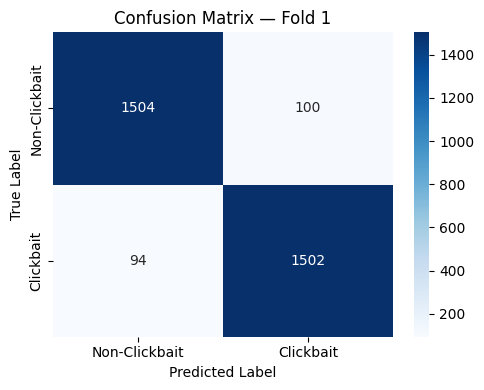

=== Fold 2 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.200900,0.201090,0.935937,0.925000,0.948718,0.936709,0.981670
2,0.216300,0.166429,0.947812,0.944169,0.951845,0.947991,0.986765
3,0.190600,0.158416,0.950313,0.946650,0.954346,0.950483,0.987692



 Fold 2 complete.

Confusion Matrix for Fold 2:
[[1510   84]
 [  83 1523]]


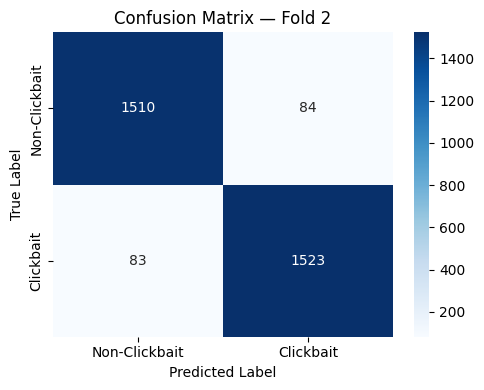

=== Fold 3 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.217500,0.201652,0.934375,0.922702,0.948093,0.935225,0.981549
2,0.243200,0.167868,0.943750,0.941506,0.946216,0.943855,0.986410
3,0.185600,0.158891,0.945312,0.940594,0.950594,0.945568,0.987270



 Fold 3 complete.

Confusion Matrix for Fold 3:
[[1500   95]
 [  66 1539]]


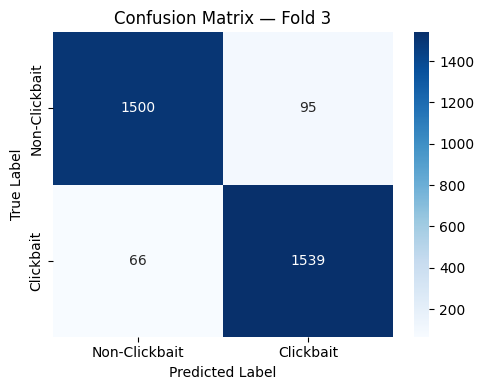

=== Fold 4 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.233700,0.195253,0.938125,0.932224,0.945034,0.938586,0.984555
2,0.169000,0.159885,0.946250,0.931722,0.963148,0.947174,0.988905
3,0.174100,0.152360,0.946562,0.944652,0.948782,0.946712,0.989313



 Fold 4 complete.

Confusion Matrix for Fold 4:
[[1536   71]
 [  58 1535]]


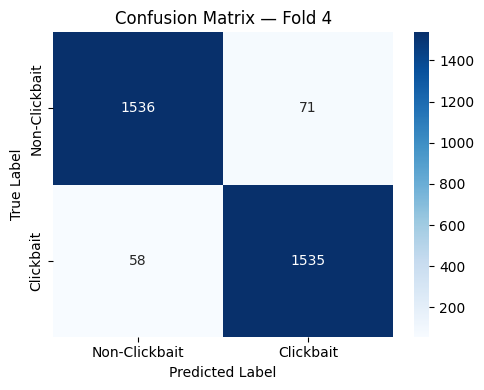

=== Fold 5 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.226600,0.192426,0.935312,0.941661,0.928125,0.934844,0.984035
2,0.248300,0.162639,0.944063,0.956326,0.930625,0.943301,0.988675
3,0.177200,0.148565,0.953438,0.951462,0.955625,0.953539,0.989830



 Fold 5 complete.

Confusion Matrix for Fold 5:
[[1500   98]
 [  78 1524]]


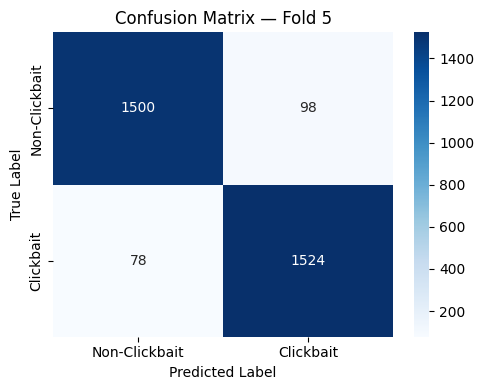

=== Fold 6 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.248700,0.196895,0.933750,0.947233,0.918851,0.932826,0.984927
2,0.204100,0.161909,0.943438,0.956326,0.929463,0.942703,0.989560
3,0.216500,0.146893,0.955313,0.953951,0.956929,0.955438,0.991017



 Fold 6 complete.

Confusion Matrix for Fold 6:
[[1537   83]
 [  67 1513]]


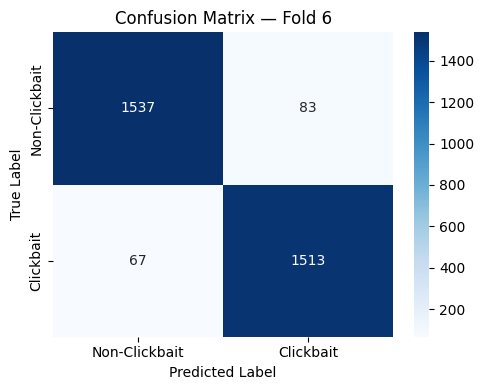

=== Fold 7 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.209800,0.202819,0.930625,0.946313,0.913233,0.929479,0.982675
2,0.159300,0.161644,0.948438,0.951603,0.945069,0.948324,0.988908
3,0.171500,0.151315,0.950937,0.948479,0.953808,0.951136,0.989837



 Fold 7 complete.

Confusion Matrix for Fold 7:
[[1541   77]
 [  76 1506]]


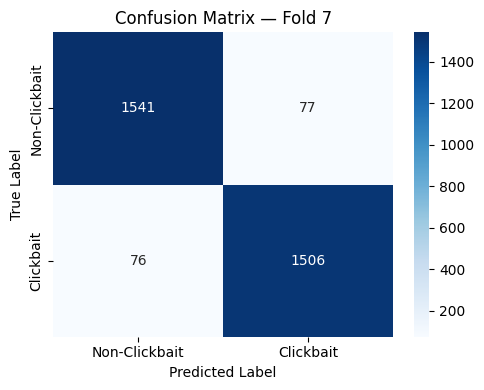

=== Fold 8 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.207200,0.182443,0.947500,0.931887,0.965646,0.948466,0.987292
2,0.174100,0.149358,0.955625,0.946724,0.965646,0.956092,0.990197
3,0.194100,0.142301,0.956875,0.950154,0.964397,0.957223,0.990768



 Fold 8 complete.

Confusion Matrix for Fold 8:
[[1523   83]
 [  61 1533]]


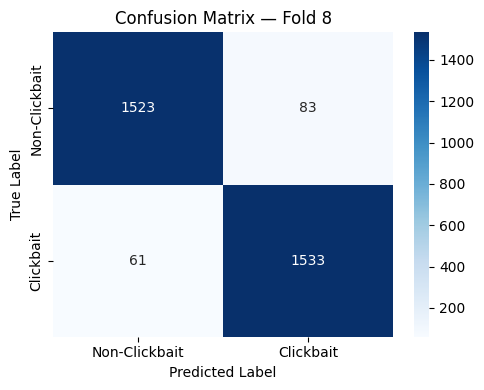

=== Fold 9 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.202700,0.195032,0.941250,0.933951,0.949184,0.941506,0.983958
2,0.197900,0.164030,0.948750,0.953680,0.942911,0.948265,0.987663
3,0.286900,0.151877,0.954375,0.953066,0.955458,0.954261,0.989286



 Fold 9 complete.

Confusion Matrix for Fold 9:
[[1481   70]
 [  82 1567]]


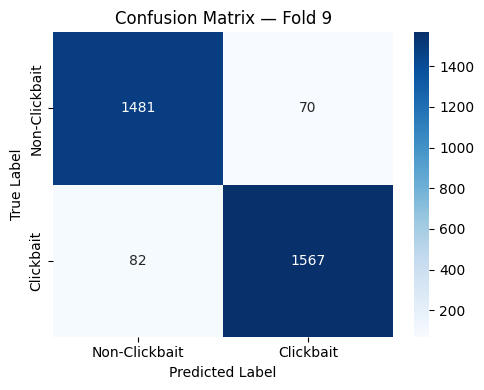

=== Fold 10 ===


Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2678708/3013790189.py:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Roc Auc
1,0.240000,0.198595,0.936562,0.921592,0.954403,0.937711,0.984202
2,0.173500,0.164218,0.940625,0.934689,0.947533,0.941067,0.987250
3,0.128500,0.156046,0.946250,0.943513,0.949407,0.946451,0.988359



 Fold 10 complete.

Confusion Matrix for Fold 10:
[[1513   95]
 [  75 1517]]


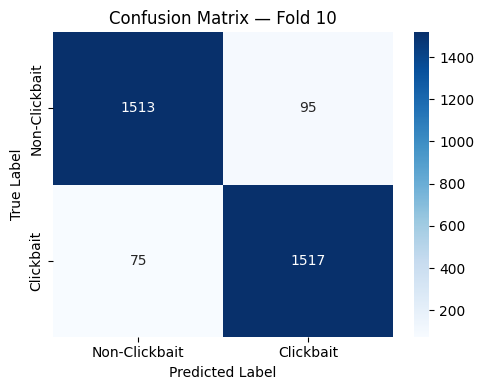

In [22]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

for fold, (train_val_index, test_index) in enumerate(kf.split(df)):
    print(f"=== Fold {fold+1} ===")

    test_df = df.iloc[test_index]

    # Remaining 9 folds for training+validation
    train_val_df = df.iloc[train_val_index]

    # --------------------------
    # Internal validation fold (8/1 split)
    # --------------------------
    train_df, val_df = train_test_split(train_val_df, test_size=1/9, random_state=42, stratify=train_val_df["labels"])

    # --------------------------
    # Convert to Hugging Face Datasets
    # --------------------------
    train_ds = Dataset.from_pandas(train_df)
    val_ds   = Dataset.from_pandas(val_df)
    test_ds  = Dataset.from_pandas(test_df)

    # --------------------------
    # Tokenize datasets
    # --------------------------
    train_ds = train_ds.map(tokenize_fn, batched=True)
    val_ds   = val_ds.map(tokenize_fn, batched=True)
    test_ds  = test_ds.map(tokenize_fn, batched=True)

    for ds in [train_ds, val_ds, test_ds]:
        ds.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

    #----------------------------------------------------------------------------------    
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
    for param in model.bert.parameters():
        param.requires_grad = False
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    #-----------------------------------------------------------------------------------

    training_args = TrainingArguments(
        output_dir=f"./results/fold_{fold+1}",
        num_train_epochs=3,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=2e-4,
        weight_decay=0.01,
        load_best_model_at_end=True,
        logging_steps=10,
        fp16=True,
        report_to="none",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    trainer.train()
    metrics = trainer.evaluate(test_ds)
    fold_results.append(metrics)
    print(f"\n Fold {fold+1} complete.")
#----------------------------------------------------
    pred = trainer.predict(test_ds)

    y_true = pred.label_ids
    y_pred = np.argmax(pred.predictions, axis=1)

    # --- Compute confusion matrix ---
    cm = confusion_matrix(y_true, y_pred)

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    print(cm)
    # Plot
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Clickbait", "Clickbait"],
            yticklabels=["Non-Clickbait", "Clickbait"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix — Fold {fold+1}")
    plt.tight_layout()
    plt.show()

In [23]:
results_df = pd.DataFrame(fold_results)
print(results_df.mean())

eval_loss                     0.152799
eval_accuracy                 0.950125
eval_precision                0.946884
eval_recall                   0.953765
eval_f1                       0.950299
eval_roc_auc                  0.988814
eval_runtime                  2.733180
eval_samples_per_second    1171.083200
eval_steps_per_second        73.192900
epoch                         3.000000
dtype: float64


In [24]:
metrics_names = ["eval_accuracy", "eval_precision", "eval_recall", "eval_f1", "eval_roc_auc"]

for metric in metrics_names:
    values = [fold[metric] for fold in fold_results]
    avg = np.mean(values)
    std = np.std(values)
    print(f"{metric}: {avg:.4f} ± {std:.4f}")


eval_accuracy: 0.9501 ± 0.0054
eval_precision: 0.9469 ± 0.0064
eval_recall: 0.9538 ± 0.0064
eval_f1: 0.9503 ± 0.0054
eval_roc_auc: 0.9888 ± 0.0020


In [26]:
encoder = model.bert 

Embedding shape: (48000, 768)


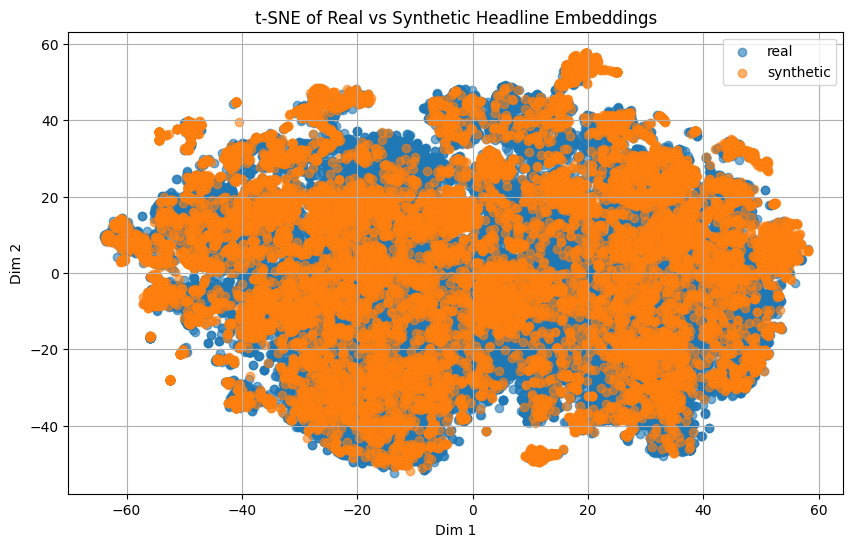

In [27]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# -----------------------------------
# 2. Combine real + synthetic
# -----------------------------------
df_s = pd.read_csv("synthetic_1.csv")
df = pd.read_csv("clickbait_title_classification.csv")


df_real = df.copy()
df_real["source"] = "real"

df_syn = df_s.copy()
df_syn["source"] = "synthetic"

df_all = pd.concat([df_real, df_syn], ignore_index=True)

texts = df_all["title"].tolist()
labels_source = df_all["source"].tolist()
labels_clickbait = df_all["clickbait"].tolist()

# -----------------------------------
# 3. Embedding extraction function
# -----------------------------------
# instead of 'model', use 'encoder' in get_embeddings
def get_embeddings(texts, batch_size=16):
    embeddings = []

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = encoder(**inputs)  # <--- use encoder here

        last_hidden = outputs.last_hidden_state
        mask = inputs.attention_mask.unsqueeze(-1).expand(last_hidden.size()).float()
        pooled = (last_hidden * mask).sum(1) / mask.sum(1)

        embeddings.append(pooled.cpu().numpy())

    return np.vstack(embeddings)


# -----------------------------------
# 4. Compute embeddings
# -----------------------------------
X = get_embeddings(texts)

print("Embedding shape:", X.shape)   # e.g., (2000, 768)

# -----------------------------------
# 5. PCA + t-SNE
# -----------------------------------
X_reduced = PCA(n_components=50).fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200).fit_transform(X_reduced)

# -----------------------------------
# 6. Plot
# -----------------------------------
plt.figure(figsize=(10, 6))

for source in ["real", "synthetic"]:
    idx = [i for i, s in enumerate(labels_source) if s == source]
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], alpha=0.6, label=source)

plt.title("t-SNE of Real vs Synthetic Headline Embeddings")
plt.legend()
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()
